In [12]:
import numpy as np
import sklearn
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import time
from datetime import datetime



In [5]:

iris_data = datasets.load_iris()
print(iris_data.data.shape)
print(iris_data)
print(iris_data.feature_names)


(150, 4)
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.

In [9]:

iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
display(iris_df)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


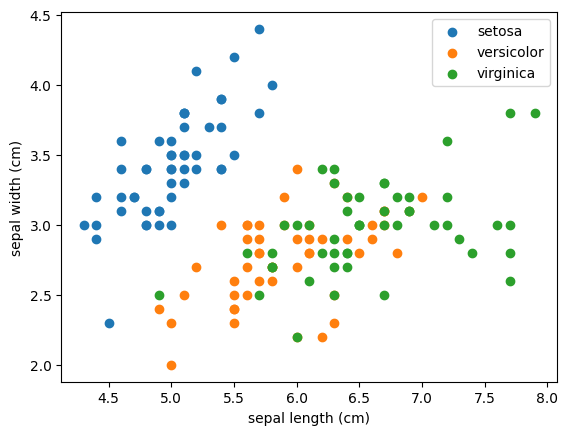

In [10]:

for targ in np.unique(iris_data.target):
    plt.scatter(iris_df[iris_data.feature_names[0]][iris_df['target'] == targ],
                iris_df[iris_data.feature_names[1]][iris_df['target'] == targ],
                label=iris_data.target_names[targ])
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.legend()
plt.show()


In [13]:
# k-Nearest neighbors

np.random.seed(datetime.now().microsecond)
indices = np.random.permutation(len(iris_df))

train_size = int(len(iris_df) * 0.8)
train_df = iris_df.iloc[indices[:train_size]]
test_df = iris_df.iloc[indices[train_size:]]

knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(train_df[iris_data.feature_names], train_df['target'])



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:

res = knn.predict(test_df[iris_data.feature_names])

res_df = pd.DataFrame({'Predicted': res, 'Actual': test_df['target']})
display(res_df)


,Predicted,Actual
65,1,1
138,2,2
135,2,2
116,2,2
93,1,1
46,0,0
109,2,2
141,2,2
11,0,0
125,2,2


In [16]:

mask = (res_df['Predicted'] == res_df['Actual'])
correct = mask.sum()
total = len(res_df)

print(f'Accuracy: {correct / total * 100:.2f}%')


Accuracy: 96.67%


In [17]:

diabetes_data = datasets.load_diabetes()



In [19]:
diabetes_df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
diabetes_df['target'] = diabetes_data.target
display(diabetes_df)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [24]:
indices = np.random.permutation(len(diabetes_df))

train_size = int(len(diabetes_df) * 0.8)
train_df = diabetes_df.iloc[indices[:train_size]]
test_df = diabetes_df.iloc[indices[train_size:]]


In [25]:

regr = sklearn.linear_model.LinearRegression()
regr.fit(train_df[diabetes_data.feature_names], train_df['target'])
print(regr.coef_)


[   2.90068038 -267.29032927  486.75766025  354.22420279 -761.08880331
  457.76829855   65.98524188  178.85988239  704.76439625   77.82847876]


In [26]:

mse = np.mean((regr.predict(test_df[diabetes_data.feature_names]) - test_df['target']) ** 2)
print(mse)

score = regr.score(test_df[diabetes_data.feature_names], test_df['target'])
print(score)


2698.0835890490243
0.5570992702075235
